# Gráfico de erros de cada metodo:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def exponencial(n, p):
    lista = []
    pontos = np.linspace(0, n, p)    
    for ponto in pontos:
        lista.append(np.exp(-5 * ponto))        
    return lista

def FE(valor_inicial, p, passo=0.1):
    valores_aproximados = [valor_inicial]
    for i in range(1, p):
        novo_valor = valores_aproximados[i-1] - 5 * passo * valores_aproximados[i-1]
        valores_aproximados.append(novo_valor)
    return valores_aproximados

def BE(valor_inicial, p, passo=0.1):
    valores_aproximados = [valor_inicial]
    for i in range(1, p):
        novo_valor = valores_aproximados[i-1] / (1+(5*passo))
        valores_aproximados.append(novo_valor)
    return valores_aproximados

def CN(valor_inicial, p, passo=0.1):
    valores_aproximados = [valor_inicial]
    for i in range(1, p):
        f_n = -5*valores_aproximados[i-1]
        f_n_1 = -5*valores_aproximados[i-1]
        novo_valor = valores_aproximados[i-1] + (passo/2)*(f_n+f_n_1)
        valores_aproximados.append(novo_valor)
    return valores_aproximados

def HU(valor_inicial, p, passo=0.1):
    def equacao(t,u):
        return -5*u
    valores_aproximados = [valor_inicial]
    for i in range(1, p):
        t_atual = passo*i
        f_n=-5*valores_aproximados[i-1]
        novo_valor = valores_aproximados[i-1] + (passo/2)*(f_n+equacao(t_atual,(valores_aproximados[i-1]+passo*f_n)))
        valores_aproximados.append(novo_valor)
    return valores_aproximados

In [3]:
valores_passos=[0.1,0.05,0.025,0.0125,0.00625]
exponencial = exponencial(2,50) 
exponencial = exponencial[49]
valores_FE = []
valores_BE = []
valores_CN = []
valores_HU = []
for passos in valores_passos:
    lista_FE = FE(1,20,passos)
    valores_FE.append(lista_FE[19])
    lista_BE = BE(1,20,passos)
    valores_BE.append(lista_BE[19])
    lista_CN = CN(1,20,passos)
    valores_CN.append(lista_CN[19])
    lista_HU= HU(1,20,passos)
    valores_HU.append(lista_HU[19])
FE_erros=[abs(exponencial)-abs(i) for i in valores_FE]
BE_erros=[abs(exponencial)-abs(i) for i in valores_BE]
CN_erros=[abs(exponencial)-abs(i) for i in valores_CN]
HU_erros=[abs(exponencial)-abs(i) for i in valores_HU]
FE_erros = abs(np.array(FE_erros))
BE_erros = abs(np.array(BE_erros))
CN_erros = abs(np.array(CN_erros))
HU_erros = abs(np.array(HU_erros))

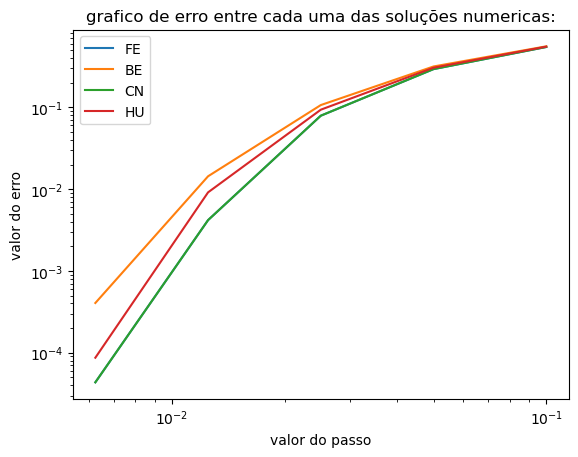

In [4]:
plt.loglog(valores_passos,np.flip(FE_erros),label = 'FE')
plt.loglog(valores_passos,np.flip(BE_erros),label = 'BE')
plt.loglog(valores_passos,np.flip(CN_erros),label = 'CN')
plt.loglog(valores_passos,np.flip(HU_erros), label = 'HU')
plt.title('grafico de erro entre cada uma das soluções numericas:')
plt.legend()
plt.xlabel('valor do passo')
plt.ylabel('valor do erro')
plt.axhline(y=0, color='black', linewidth=0.8)